In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
%matplotlib inline

The `gradient_descent` function minimizes a function. By default, it uses a learning rate of 0.1 and runs 400 times. These values can be modified. 

It normally returns a tuple of the minimum value of the function and the `x` (the input) at which it occurs.

The `testing` parameter, which if `False` by default, if set to `True`, gives two additional parameters, an array mentioning the iteration and another array giving the corresponding cost. This flag can be used to check if gradient descent is indeed converging. 

In [2]:
def gradient_descent(func, func_derivative, initial_x, alpha = 0.1, N = 400, testing = False):
    x = initial_x
    y = func(x)
    
    if testing:
        Y_data = np.zeros(N+1)
        X_data = np.arange(0, N+1, 1)
        Y_data[0] = y
    
    for i in range(N):
        x -= alpha * func_derivative(x)
        if testing:
            X_data[i] = i
            Y_data[i] = func(x)
        
    if testing:
        return (func(x), x, X_data, Y_data)
    else:
        return (func(x), x)

Below, some small code is included which checks gradient descent. 

- It uses the function $y(x) = x^2$ and its derivative $\frac{dy}{dx} = 2x$. 
- It starts at a value of $x=40$. 
- It uses 20 iterations. 
- A graph is plotted showing how the function rapidly decreases as better and better $x$ values are chosen.

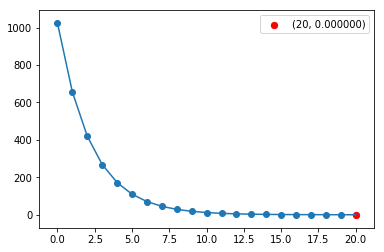

In [3]:
def f(x):
    return x*x

def f_der(x):
    return 2*x

X, Y = gradient_descent(f, f_der, 40, N = 20, testing = True)[2:]
plt.plot(X, Y)
plt.scatter(X[:-1], Y[:-1])
plt.scatter([X[-1]], [Y[-1]], c = 'r', s = 40, label = str("({}, {:f})".format(X[-1], Y[-1])))
plt.legend()

A set of points in 2D space are randomly generated. The x range of the points is from -10 to 10 and the y range is -100 to 100. 

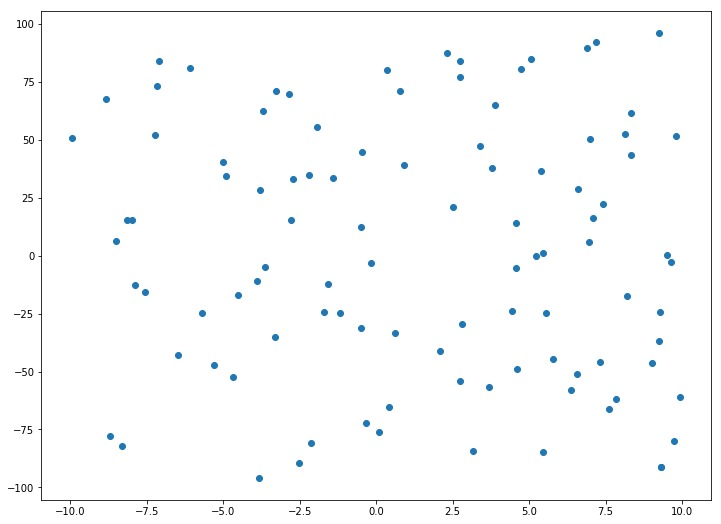

In [4]:
x_pool = np.arange(-10, 10, 0.025)
y_pool = np.arange(-100, 100, 0.25)

x_sample = np.array([random.choice(x_pool) for i in range(100)])
y_sample = np.array([random.choice(y_pool) for i in range(100)])

plt.figure(figsize = (12, 9))
plt.scatter(x_sample, y_sample)

The dataset has been formally represented in `X` and `y`. `X` is a two dimentional array, with the number of rows matching the number of points and the columns to hold the $x$ and $y$ coordinates. 

The points have been placed into one or two classes depending on whether they are above or below the parabola $y=x^2$. Specifically, points satisfying $y - x^2 < 0$ have been labelled `1` and the others `0`. The array `y` holds these labels. 

These two classes are shown graphically as well. 

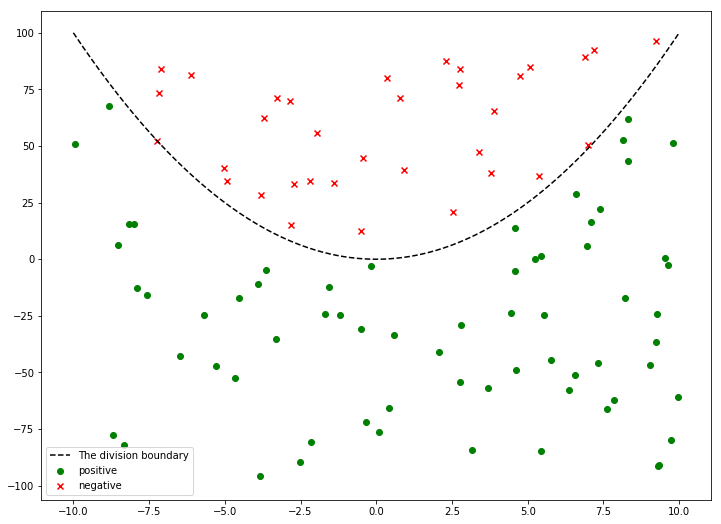

In [58]:
X = np.array((x_sample, y_sample)).T
y = 1*((y_sample - x_sample**2) < 0)

pos = X[y.astype('bool')]
neg = X[~y.astype('bool')]

plt.figure(figsize = (12, 9))
plt.plot(np.arange(-10, 10, 0.01), np.arange(-10, 10, 0.01)**2, 'k--', label = "The division boundary", )
plt.scatter(pos[:, 0], pos[:, 1], marker = 'o', c = 'g', label = 'positive')
plt.scatter(neg[:, 0], neg[:, 1], marker = 'x', c = 'r', label = 'negative')
plt.legend()


The logistic regression classifier creates a linear function of the features (which are the x and y coordinates here) which best seperates the two classes of points. The classes are determined by the sign of this linear function. *Best* is mathematically determined in terms of what is called a **cost function**. Points that are wrongly classified are penalised and add to the total *cost* and the goal is to minimize the cost. This is where the gradient descent algorithm plays a role. 

The graph above suggest that a linear separator might not do the best job and that is indeed true. Since the points have been assigned classes based on which side of a parabola they fall on, it is a parabolic curve that best fits them. Such a curve will be tried out later. 

The sigmoid function is given by
$$
s(x) = \frac{1}{1 + e^{-x}}
$$
As the graph below shows, it maps large positive numbers close to 1 and large negative number close to 0. Numbers close to 0 are closer to 0.5. 

If the classifier function ouputs a large value for a particular point, it signifies a confident classification since the  point is far from the boundary. In such cases, if this is fed to a sigmoid function, it outputs a value close to 1 or 0. 

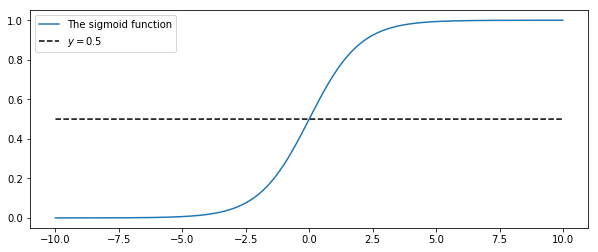

In [44]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

plt.figure(figsize = (10, 4))
plt.plot(np.arange(-10, 10, 0.01), sigmoid(np.arange(-10, 10, 0.01)), label = "The sigmoid function")
plt.plot(np.arange(-10, 10, 0.01), np.zeros(len(np.arange(-10, 10, 0.01)))+0.5, 'k--', label = '$y = 0.5$')
plt.legend()

The main purpose of the sigmoid function is to assign costs to classifications. Once the classifier is trained and the function is determined, there is no requirement to use the sigmoid function. The sign of the function for a certain point is sufficient information to determine the class. 

The features are usually represented as $(x_1, x_2, ..., x_n)$. The linear function will then look something like
$$
f(x_1, x_2) = \theta_0 + \theta_1 x_1 + \theta_2 x_2
$$

Using matrices, 
$$
\theta = 
\begin{pmatrix}
\theta_0 \\
\theta_1 \\
\theta_2
\end{pmatrix}, 
\textbf{x} = 
\begin{pmatrix}
1 \\
x_1 \\
x_2 \\
\end{pmatrix}
$$

Since this is then fed to the sigmoid function, the final value is which the classifier predicts is
$$
h_{\theta}(\textbf{x}) = \frac{1}{1 + e^{-\theta^T \textbf{x}}}
$$

If this function, called the **hypothesis function** (since it is what is used to determine how to classify the points), gives a value close to 1 for the particular point and the true value is indeed close to 1, we want to add a very small *cost*. However, if it is incorrectly classified, a heavy *cost* is levied. A similar rule is applied when the function gives a value close to 0. 

Mathematically, 
$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} y^{(i)}(\log\left[h_{\theta}(x^{(i)})\right]) + (1-y^{(i)})(\log\left[1 - h_{\theta}(x^{(i)})\right])
$$

The $\Sigma$ is because we calculate the cost for each point and total it. All the $y^{(i)}$ terms take the value 1 or 0 only. Therefore, either the first or the second term is zero always. 

When $y^{(i)} = 1$, the logarithm of the hypothesis is zero when the hyphothesis is close to one and near infinity (negative) when it predicts such a point is close to zero. These penalty rules have been mentioned earlier with the mathematics.

The code to the cost function is given below. It takes the `X` and `y` arrays as input and the $\theta$ array which characterises the model. It returns the total cost. Since the parameters are arrays, the expressions can all be vectorized.

In [54]:
def costLogistic(X, y, theta):
    m = len(y) # number of training examples
    X = np.matrix(X)
    y = np.matrix(y).T
    theta = np.matrix(theta).T
    return (-1/m)*(y.T * np.log(sigmoid(X * theta)) + (1-y.T) * np.log(1-sigmoid(X * theta)))[0, 0]

In [55]:
(np.log(sigmoid(7)) + np.log(1-sigmoid(17)))/(-2)

8.500455752472597